In [ ]:
import numpy as np
import json
import codecs
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import keras
import keras.backend as K
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation
import pickle
import csv


In [ ]:
names = json.loads(codecs.open( "l10n.json", "r", "utf_8_sig" ).read() )
graph = json.loads(codecs.open( "data.json", "r", "utf_8_sig" ).read() )

In [ ]:
# !rm *.json

In [ ]:
nodeStdict={}
for stop in graph['stops']['items']:
    nodeStdict[stop['nodeId']]=stop['stationId']
coordDict={}
for node in graph['nodes']['items']:
    coordDict[node['id']]=(node['attributes']['geoPoint']['lon'],node['attributes']['geoPoint']['lat'])
lats=[]
longs=[]
for value in coordDict.values():
    lats.append(value[1])
    longs.append(value[0])
for k,v in coordDict.items():
    coordDict[k]=((v[0]-np.min(longs))/(np.max(longs)-np.min(longs)),(v[1]-np.min(lats))/(np.max(lats)-np.min(lats)))

In [ ]:
G=nx.Graph()
for node in graph['nodes']['items']:
    G.add_node(node['id'])
for link in graph['links']['items']:
    G.add_edge(link['fromNodeId'], link['toNodeId'], length=link['attributes']['time'])
nodestoremove=[]
for node in G.nodes():
    if len(G.edges(node))<2:
        nodestoremove.append(node)
for node in nodestoremove:
    G.remove_node(node)
labels={}
for node in G.nodes():
    try:
        labels[node]=names['keysets']['generated'][nodeStdict[node]+'-name']['ru']
    except: labels[node]='error'

In [ ]:
# G = nx.relabel_nodes(G, labels) # Переименовать станции адекватными названиями

In [ ]:
G.nodes

NodeView(('nd96585445', 'nd26538282', 'nd26848058', 'nd05221367', 'nd87379102', 'nd69597378', 'nd92439063', 'nd86441857', 'nd03974984', 'nd88508405', 'nd96805546', 'nd39186626', 'nd18653016', 'nd63255268', 'nd98057781', 'nd25404154', 'nd41653791', 'nd10154281', 'nd00660370', 'nd46626939', 'nd30590352', 'nd30493111', 'nd81661821', 'nd07758971', 'nd84181627', 'nd93897745', 'nd77715428', 'nd98028666', 'nd57728311', 'nd79600799', 'nd25251174', 'nd22676407', 'nd52567902', 'nd67006335', 'nd84117809', 'nd90931992', 'nd48508909', 'nd76502065', 'nd32188676', 'nd43921743', 'nd32931279', 'nd40711636', 'nd85643871', 'nd82606076', 'nd14002145', 'nd80796452', 'nd97151226', 'nd82585600', 'nd22589473', 'nd58364754', 'nd03835004', 'nd87791778', 'nd22550859', 'nd04610186', 'nd89888067', 'nd65899681', 'nd33027169', 'nd08368608', 'nd34235957', 'nd17103411', 'nd82407076', 'nd73824893', 'nd36083750', 'nd16826576', 'nd58062789', 'nd85770241', 'nd08948812', 'nd67913907', 'nd16267657', 'nd56760912', 'nd7316383

In [ ]:
def calc_time(st1, st2):
  return nx.dijkstra_path_length(G, source=st1, target=st2, weight="length")/60

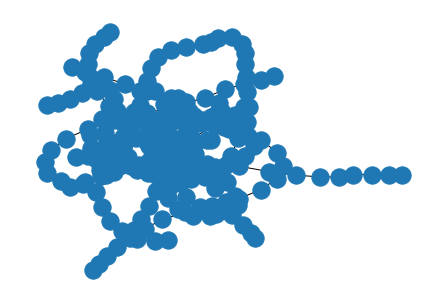

In [ ]:
nx.draw(G)

In [ ]:
av1 = "nd99758233"
av2 = "nd08346904"
labels

{'nd96585445': 'Бульвар Рокоссовского',
 'nd26538282': 'Черкизовская',
 'nd26848058': 'Преображенская площадь',
 'nd05221367': 'Сокольники',
 'nd87379102': 'Красносельская',
 'nd69597378': 'Комсомольская',
 'nd92439063': 'Красные Ворота',
 'nd86441857': 'Чистые пруды',
 'nd03974984': 'Лубянка',
 'nd88508405': 'Охотный Ряд',
 'nd96805546': 'Библиотека имени Ленина',
 'nd39186626': 'Кропоткинская',
 'nd18653016': 'Парк культуры',
 'nd63255268': 'Фрунзенская',
 'nd98057781': 'Спортивная',
 'nd25404154': 'Воробьёвы горы',
 'nd41653791': 'Университет',
 'nd10154281': 'Проспект Вернадского',
 'nd00660370': 'Юго-Западная',
 'nd46626939': 'Тропарёво',
 'nd30590352': 'Румянцево',
 'nd30493111': 'Саларьево',
 'nd81661821': 'Ховрино',
 'nd07758971': 'Беломорская',
 'nd84181627': 'Речной вокзал',
 'nd93897745': 'Водный стадион',
 'nd77715428': 'Войковская',
 'nd98028666': 'Сокол',
 'nd57728311': 'Аэропорт',
 'nd79600799': 'Динамо',
 'nd25251174': 'Белорусская',
 'nd22676407': 'Маяковская',
 'nd525

In [ ]:
calc_time(av1, av2)

NodeNotFound: ignored

In [ ]:
res = {}
counter = {}
for st1_id, st1_name in labels.items():
  res[f"{st1_id}_{st1_name}"] = []
  counter[f"{st1_id}_{st1_name}"] = 0
  for st2_id, st2_name in labels.items():
    if st1_id != st2_id and calc_time(st1_id, st2_id) < 20:
      res[f"{st1_id}_{st1_name}"].append(f"{st2_id}_{st2_name}")
      counter[f"{st1_id}_{st1_name}"] += 1
      print(st1_name, st2_name)

Streaming output truncated to the last 5000 lines.
Авиамоторная Лубянка
Авиамоторная Охотный Ряд
Авиамоторная Белорусская
Авиамоторная Маяковская
Авиамоторная Тверская
Авиамоторная Театральная
Авиамоторная Новокузнецкая
Авиамоторная Павелецкая
Авиамоторная Автозаводская
Авиамоторная Технопарк
Авиамоторная Семёновская
Авиамоторная Электрозаводская
Авиамоторная Бауманская
Авиамоторная Курская
Авиамоторная Площадь Революции
Авиамоторная Арбатская
Авиамоторная Смоленская
Авиамоторная Парк культуры
Авиамоторная Октябрьская
Авиамоторная Добрынинская
Авиамоторная Павелецкая
Авиамоторная Таганская
Авиамоторная Курская
Авиамоторная Комсомольская
Авиамоторная Проспект Мира
Авиамоторная Киевская
Авиамоторная Проспект Мира
Авиамоторная Сухаревская
Авиамоторная Тургеневская
Авиамоторная Китай-город
Авиамоторная Третьяковская
Авиамоторная Октябрьская
Авиамоторная Шаболовская
Авиамоторная Ленинский проспект
Авиамоторная Баррикадная
Авиамоторная Пушкинская
Авиамоторная Кузнецкий Мост
Авиамоторная Кита

In [ ]:
res

{'nd96585445_Бульвар Рокоссовского': ['nd26538282_Черкизовская',
  'nd26848058_Преображенская площадь',
  'nd05221367_Сокольники',
  'nd87379102_Красносельская',
  'nd69597378_Комсомольская',
  'nd92439063_Красные Ворота',
  'nd86441857_Чистые пруды',
  'nd03974984_Лубянка',
  'nd44494127_Комсомольская',
  'nd26001309_Ботанический сад',
  'nd27410040_Андроновка',
  'nd07934066_Шоссе Энтузиастов',
  'nd95180222_Соколиная гора',
  'nd58718772_Измайлово',
  'nd99628046_Локомотив',
  'nd25992132_Бульвар Рокоссовского',
  'nd32033142_Белокаменная',
  'nd97550156_Ростокино'],
 'nd26538282_Черкизовская': ['nd96585445_Бульвар Рокоссовского',
  'nd26848058_Преображенская площадь',
  'nd05221367_Сокольники',
  'nd87379102_Красносельская',
  'nd69597378_Комсомольская',
  'nd92439063_Красные Ворота',
  'nd86441857_Чистые пруды',
  'nd03974984_Лубянка',
  'nd88508405_Охотный Ряд',
  'nd58364754_Партизанская',
  'nd03835004_Семёновская',
  'nd73489008_Курская',
  'nd44494127_Комсомольская',
  'nd310

In [ ]:
counter

{'nd96585445_Бульвар Рокоссовского': 18,
 'nd26538282_Черкизовская': 28,
 'nd26848058_Преображенская площадь': 35,
 'nd05221367_Сокольники': 55,
 'nd87379102_Красносельская': 73,
 'nd69597378_Комсомольская': 87,
 'nd92439063_Красные Ворота': 96,
 'nd86441857_Чистые пруды': 113,
 'nd03974984_Лубянка': 115,
 'nd88508405_Охотный Ряд': 111,
 'nd96805546_Библиотека имени Ленина': 112,
 'nd39186626_Кропоткинская': 102,
 'nd18653016_Парк культуры': 96,
 'nd63255268_Фрунзенская': 83,
 'nd98057781_Спортивная': 75,
 'nd25404154_Воробьёвы горы': 44,
 'nd41653791_Университет': 20,
 'nd10154281_Проспект Вернадского': 14,
 'nd00660370_Юго-Западная': 11,
 'nd46626939_Тропарёво': 8,
 'nd30590352_Румянцево': 7,
 'nd30493111_Саларьево': 6,
 'nd81661821_Ховрино': 7,
 'nd07758971_Беломорская': 8,
 'nd84181627_Речной вокзал': 14,
 'nd93897745_Водный стадион': 20,
 'nd77715428_Войковская': 32,
 'nd98028666_Сокол': 47,
 'nd57728311_Аэропорт': 69,
 'nd79600799_Динамо': 93,
 'nd25251174_Белорусская': 107,
 'nd

In [ ]:
with open('counter.csv', 'w') as f:
    for key in counter.keys():
        f.write("%s,%s\n"%(key,counter[key]))

In [ ]:
with open('res.csv', 'w') as f:
    for key in res.keys():
        f.write("%s,%s\n"%(key,res[key]))

In [ ]:
calc_time("nd75204137", "nd65047054")

NodeNotFound: ignored

In [ ]:
calc_time("nd96713182", "nd65047054")

NetworkXNoPath: ignored

Старое приложение


181.0 232.0
232.0 233.0
233.0 234.0
234.0 137.0
201.0 202.0
202.0 203.0
203.0 204.0
204.0 205.0
205.0 206.0
206.0 207.0
207.0 208.0
208.0 209.0
209.0 210.0
210.0 211.0
211.0 212.0
212.0 213.0
213.0 214.0
214.0 215.0
215.0 216.0
216.0 217.0
217.0 218.0
218.0 219.0
219.0 220.0
220.0 221.0
221.0 222.0
222.0 223.0
223.0 224.0
224.0 225.0
225.0 226.0
226.0 227.0
227.0 228.0
228.0 229.0
229.0 230.0
230.0 231.0
231.0 201.0
136.0 202.0
86.0 201.0
1.0 229.0
2.0 228.0
43.0 227.0
128.0 225.0
163.0 220.0
32.0 219.0
97.0 215.0
15.0 214.0
63.0 213.0
70.0 212.0
112.0 210.0
111.0 208.0
22.0 206.0
1.0 2.0
2.0 3.0
3.0 4.0
4.0 5.0
5.0 6.0
6.0 7.0
6.0 77.0
7.0 8.0
8.0 9.0
8.0 92.0
8.0 159.0
9.0 10.0
9.0 117.0
10.0 11.0
10.0 29.0
11.0 12.0
11.0 49.0
11.0 68.0
11.0 144.0
12.0 13.0
13.0 14.0
13.0 71.0
14.0 15.0
15.0 16.0
16.0 17.0
17.0 18.0
18.0 19.0
19.0 196.0
196.0 199.0
199.0 200.0
20.0 21.0
21.0 22.0
22.0 23.0
23.0 24.0
24.0 25.0
25.0 26.0
26.0 27.0
26.0 80.0
27.0 28.0
28.0 29.0
28.0 116.0
28.0 143.0
29.

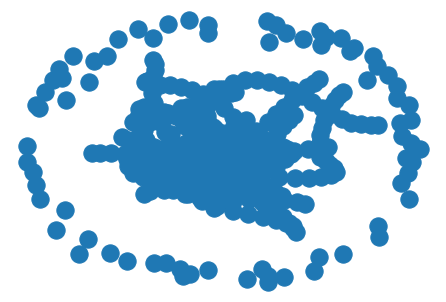

In [ ]:
import pandas as pd
stations_data = pd.read_csv("stations.csv")
stations_data = stations_data[stations_data["type"] == "Station"]
stations_data["st_id"] = stations_data["station_id"]
connections_data = pd.read_csv("link.csv")
strings = pd.read_csv("strings.csv")
G=nx.Graph()
labels = {}
stations =  strings.set_index("id").join(stations_data.set_index("station_id"), lsuffix="_l_", rsuffix="_r_")
for station in stations.to_dict(orient="records"):
  G.add_node(station["st_id"])

  labels[station["st_id"]] = station["string"]
for connection in connections_data.values:
  print(connection[4], connection[5])
  G.add_edge(int(connection[4]), int(connection[5]), length=connection[1])
nx.draw(G)

In [ ]:
strings[strings["id"] == station[1]]["string"].values

array([], dtype=object)

In [ ]:
stations_data.join(strings, "id", "station_id")

KeyError: ignored

,type_l_,lang,string,scheme_id_l_,id,type_r_,positionX,positionY,latitude,longitude,timeWeight,customSchemePositionX,customSchemePositionY,alignment,sameAsStation,scheme_id_r_,line_id,zoom,closed_type,visibility
1,2,ru,Бульвар Рокоссовского,1,6277,Transfer,872.0,179.0,55.814400,37.734001,0.0,-1.0,-1.0,left,-1,1,1,16,NaN,1
1,2,ru,Бульвар Рокоссовского,1,6514,Station,378.0,15.0,60.050190,30.442944,0.0,-1.0,-1.0,left,-1,2,1,16,NaN,1
1,2,ru,Бульвар Рокоссовского,1,6581,Station,120.0,75.0,50.464882,30.354795,0.0,-1.0,-1.0,right,-1,8,1,16,NaN,1
1,2,ru,Бульвар Рокоссовского,1,6633,Station,100.0,300.0,49.982868,36.182076,0.0,-1.0,-1.0,right,-1,9,1,16,NaN,1
1,2,ru,Бульвар Рокоссовского,1,6663,Station,295.0,20.0,53.945831,27.689722,0.0,-1.0,-1.0,left,-1,13,1,16,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,2,ru,Фонвизинская,1,6454,Station,615.0,139.0,55.823059,37.587624,0.0,-1.0,-1.0,left,-1,1,10,16,NaN,1
234,2,ru,Петровско-Разумовская,1,6453,Transfer,599.0,114.0,55.835598,37.574089,0.0,611.0,99.0,left,-1,1,10,16,NaN,1
235,2,ru,Минская,1,6425,Station,149.0,623.0,55.725010,37.496773,0.0,-1.0,-1.0,right,-1,1,8,16,NaN,1
236,2,ru,Ломоносовский проспект,1,6426,Station,149.0,648.0,55.707062,37.516068,0.0,139.0,634.0,right,-1,1,8,16,NaN,1


In [ ]:
stations_data

,id,station_id,type,positionX,positionY,latitude,longitude,timeWeight,customSchemePositionX,customSchemePositionY,alignment,sameAsStation,scheme_id,line_id,zoom,closed_type,visibility
0,6277,1,Transfer,872.0,179.0,55.814400,37.734001,0.0,-1.0,-1.0,left,-1,1,1,16,NaN,1
1,6278,2,Transfer,863.0,203.0,55.803787,37.744732,0.0,-1.0,-1.0,right,-1,1,1,16,NaN,1
2,6279,3,Station,839.0,224.0,55.796070,37.715633,0.0,-1.0,-1.0,left,-1,1,1,16,NaN,1
3,6280,4,Station,820.0,242.0,55.789253,37.679737,0.0,-1.0,-1.0,left,-1,1,1,16,NaN,1
4,6281,5,Station,798.0,263.0,55.779957,37.665966,0.0,-1.0,-1.0,left,-1,1,1,16,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,6880,200443,Station,44.0,248.0,41.022057,28.625305,0.0,64.0,241.0,left,-1,100,13,16,NaN,1
604,6881,200444,Transfer,1157.0,340.0,41.077499,29.013300,0.0,-1.0,-1.0,left,200033,100,14,16,NaN,1
605,6882,200445,Station,1200.0,340.0,41.076965,29.024685,0.0,1176.0,313.0,left,-1,100,14,16,NaN,1
606,6883,200446,Station,1300.0,280.0,41.082191,29.037817,0.0,1259.0,262.0,left,-1,100,14,16,NaN,1
